In [ ]:
# @title Загружаем библиотеки
!pip install pydicom
import os
import numpy as np
import nibabel as nib
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import seaborn as sns
sns.set_style('darkgrid')
import gdown
import pydicom as dicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
image_list = []
gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001.zip', None, quiet=True)
!unzip -qo LUNG1-001 -d /content/data
folder_path = '/content/data/LUNG1-001'
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.dcm'):
        image_list.append(os.path.join(folder_path, filename))

In [ ]:
n = 55
image_path = image_list[n-1]
ds = dicom.dcmread(image_path)

### Загрузка масок nii.gz

In [ ]:
image_path1 = gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001_thor_cav_primary_reviewer.nii.gz', None, quiet=True)
image_path2 = gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001_effusion_second_reviewer.nii.gz', None, quiet=True)
image_obj1 = nib.load(image_path1)
image_obj2 = nib.load(image_path2)

### Конвертирует nii.gz в массив

In [ ]:
image_data1 = image_obj1.get_fdata()
image_data2 = image_obj2.get_fdata()
rotated_image1 = np.rot90(image_data1)

### Отображает размеры файла

In [ ]:
height1, width1, depth1 = image_data1.shape
height2, width2, depth2 = image_data2.shape
print(f"Размерность объекта изображения сегментирование грудной клетки:  {height1}, ширина: {width1}, глубина:{depth1}")
print(f"Размерность объекта изображения сегментирование плеврального выпота:  {height2}, ширина: {width2}, глубина:{depth2}")

Размерность объекта изображения сегментирование грудной клетки:  512, ширина: 512, глубина:134
Размерность объекта изображения сегментирование плеврального выпота:  512, ширина: 512, глубина:134


### Показывает изображения слоя

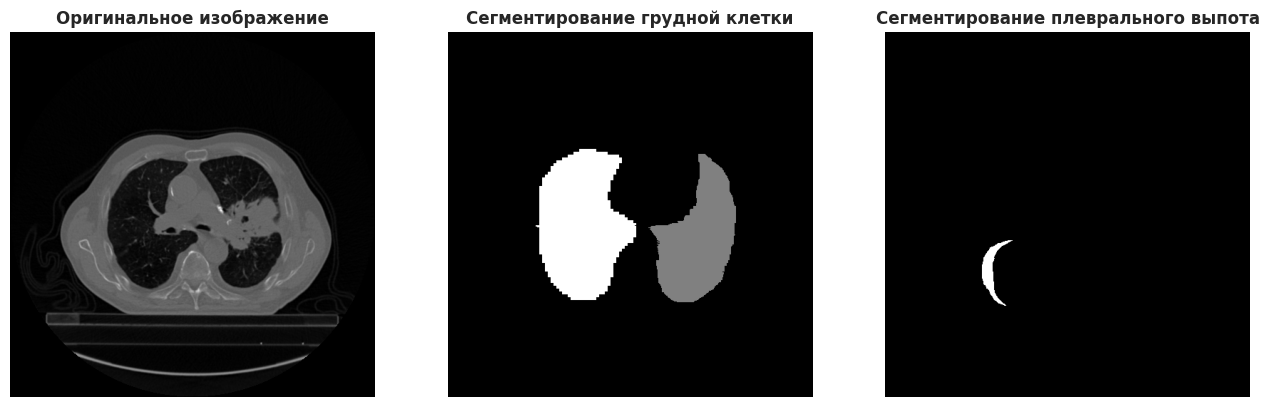

In [ ]:
plt.figure(1, figsize=(16, 10))
plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение', fontweight='bold')
plt.imshow(ds.pixel_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Сегментирование грудной клетки', fontweight='bold')
plt.imshow(rotated_image1[:, :, n], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Сегментирование плеврального выпота', fontweight='bold')
plt.imshow(image_data2[:, :, n], cmap='gray')
plt.axis('off')

plt.show()